# 전국 신규 민간 아파트 분양가격 분석하기

## 공공데이터 다운로드 후 로드하기

### 데이터셋 다운로드 받기

http://bit.ly/open-data-set-folder

* 전국 평균 분양가격(2013~2015)
* 전국 평균 분양가격(~2019)           

분양가격은 1,000원 단위임.

### 판다스 import 하기

In [1]:
import pandas as pd

### 파일을 로드해서 변수에 담기

In [2]:
# pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv")
# UnicodeDecodeError가 발생. 기본은 utf-8, 한국 전산시스템이 한국 완성형 코드인 'EUC-KR'을 사용하기 때문.(2350자만 표현가능)
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv",encoding="euc-kr") #cp949로 지정해도 가능

In [3]:
df_last.shape #(행, 열)

(4335, 5)

In [4]:
#데이터 미리보기
df_last.head() #shift + tab을 누르면 메서드의 도움말을 볼 수 있다.

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [6]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",encoding = "cp949")

In [7]:
df_first.shape

(17, 22)

In [8]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [9]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 요약하기

In [10]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


분양가격은 결측치 때문에 개수가 다르다.

### 결측치 보기

In [11]:
True == 1

True

In [12]:
False == 0

True

In [13]:
True + True + False

2

In [14]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [15]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [16]:
df_last.isna().sum() # innull()과 결과는 동일

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

 ### 데이터 타입 변경
 분양가격이 object(문자) 타입으로 되어있다. 문자열 타입은 계산을 할 수 없기에(sum, avg값 등) 수치 데이터로 변경해준다. 그런데 결측치가 섞여 있으면 변환이 제대로 되지 않는다. 그래서 pd.to_numeric을 사용하여 데이터의 타입을 변경해주어야 한다.

In [17]:
df_last["분양가격(㎡)"] #분양가격 열만 보기

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4330    3882
4331     NaN
4332    3898
4333     NaN
4334    3601
Name: 분양가격(㎡), Length: 4335, dtype: object

In [18]:
# df_last["분양가격(㎡)"].astype(int) -> 결측치 때문에 ValueError가 발생

In [19]:
# pd.to_numeric(df_last["분양가격(㎡)"]) -> 에러발생

In [20]:
pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64

왜 float로 나오는가?

In [21]:
type(pd.np.nan) #pandas에 내장된 numpy의 nan이 float형이기 떄문에

C:\Users\Study\AppData\Local\Temp/ipykernel_11684/3367481099.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  type(pd.np.nan) #pandas에 내장된 numpy의 nan이 float형이기 떄문에


float

In [22]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')

In [23]:
df_last["분양가격"].mean() #평균

3238.128632802628

In [24]:
df_last["분양가격"].sum() #합

12813275.0

In [25]:
df_last["분양가격"].max() #최댓값

12728.0

### 평당분양가격 구하기
2013년부터의 데이터는 평당분양가격 기준인데 반해, 최근데이터는 1제곱미터당 평균분양가격이기 때문에 단위를 똑같이 만들어줄 필요가 있다.

In [26]:
df_last["분양가격"] * 3.3

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4330    12810.6
4331        NaN
4332    12863.4
4333        NaN
4334    11883.3
Name: 분양가격, Length: 4335, dtype: float64

In [27]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


### 분양가격 요약하기 .describe()

In [28]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [29]:
# 변경 전 컬럼인 분양가격(㎡) 요약. 
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

- unique : 고유한 데이터
- top : 가장 빈번하게 등장하는 데이터 -> 2221
- freq : 가장 빈번하게 등장한 데이터가 등장한 횟수 -> 2221이 17번 등장했다.

In [30]:
# 수치데이터로 변경된 분양가격 요약.
df_last["분양가격"].describe() # float이기 떄문에 요약 결과가 다르게 나온다.

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

왜 float에서의 전체 데이터 개수(count)가 더 작은가?
-> object에서는 공백 데이터도 결측치가 아니라 데이터가 있는 것으로 간주

- mean : 평균값
- std : 표준편차
- 25% : 제 1사분위수 -> 데이터의 25%가 이 값보다 작거나 같음.
- 50% : 제 2사분위수 -> 데이터의 50%가 이 값보다 작거나 같음.
- 75% : 제 3사분위수 -> 데이터의 75가 이 값보다 작거나 같음.

 **.describe()** 에서 중요한 것은 **평균값(mean)과 중앙값(50%)의 차이**
 
 중앙값보다 평균값이 훨씬 높다. -> 최댓값 때문에 평균값이 더 높게 나타났다.

### 문자열 데이터 교체하기('규모구분'->'전용면적')

모든 컬럼이 전용면적을 기준으로 하고, 예외는 '전체'가 유일하기 때문에 '규모구분'을 전용면적으로 변경하는 것이 더 직관적이다.
또한 데이터에 중복되는 '전용면적'이라는 문구가 불필요하게 반복되어 메모리의 효율성을 위해서 컬럼명으로 전용면적으로 하고 데이터의 전용면적 문구를 제거하는 것이 좋다.

In [31]:
df_last["규모구분"].unique() 

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [32]:
# 데이터의 특정 문자열을 제거(교체) 하는 법

#df_last["규모구분"].replace("전용면적","") <- 바뀌지 않음, 데이터 내부의 문자열이 모두 같아야 하기 때문.

df_last["규모구분"].str.replace("전용면적","")

0                  전체
1               60㎡이하
2         60㎡초과 85㎡이하
3        85㎡초과 102㎡이하
4              102㎡초과
            ...      
4330               전체
4331            60㎡이하
4332      60㎡초과 85㎡이하
4333     85㎡초과 102㎡이하
4334           102㎡초과
Name: 규모구분, Length: 4335, dtype: object

In [33]:
df_last["규모구분"]

0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
4330                   전체
4331           전용면적 60㎡이하
4332     전용면적 60㎡초과 85㎡이하
4333    전용면적 85㎡초과 102㎡이하
4334          전용면적 102㎡초과
Name: 규모구분, Length: 4335, dtype: object

바뀌지 않는다. 새로운 컬럼에 써주지 않았기 때문. 따라서 새로운 컬럼을 만들어 거기에 '전용면적'을 제거한 데이터를 담아보자.

In [34]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","")
df_last["전용면적"] = df_last["전용면적"].str.strip() #앞 뒤 공백제거
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [35]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN,60㎡
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4,60㎡~85㎡
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN,85㎡~102㎡


### 사용하지 않는 컬럼 제거하기

In [36]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체


In [37]:
df_last = df_last.drop(["규모구분","분양가격(㎡)"],axis=1) #axis 0은 행, axis 1은 열, 0을 하면 규모구분이라는 키가 없기에 오류

In [38]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [39]:
df_last.info() #메모리가 줄은 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


### groupby로 데이터 집계하기

In [40]:
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [41]:
df_last.groupby(["지역명"])["평당분양가격"].max()

지역명
강원    11873.4
경기    18711.0
경남    14199.9
경북    11408.1
광주    16107.3
대구    17021.4
대전    16094.1
부산    15255.9
서울    42002.4
세종    12972.3
울산    11860.2
인천    17120.4
전남    10074.9
전북    10071.6
제주    18024.6
충남    10563.3
충북     9421.5
Name: 평당분양가격, dtype: float64

In [42]:
df_last.groupby(["지역명"])["평당분양가격"].min()

지역명
강원     6639.6
경기    10160.7
경남     7260.0
경북     6949.8
광주     7428.3
대구     8259.9
대전     8002.5
부산     9669.0
서울    16701.3
세종     8487.6
울산     7992.6
인천     9537.0
전남     6289.8
전북     6270.0
제주     7342.5
충남     6926.7
충북     6164.4
Name: 평당분양가격, dtype: float64

In [43]:
df_last.groupby(["지역명"])["평당분양가격"].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [44]:
df_last.groupby(["전용면적"])["평당분양가격"].mean() #전용면적별로 평당 분양가격 구하기

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [45]:
# 두 개의 값을 인덱스로 집계하기 (지역명, 전용면적)
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean()

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [46]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack() # "전용면적"을 컬럼으로.

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588000,8749.557143,7477.536000
경기,14771.790000,13251.744000,12523.566000,13677.774000,12559.602000
경남,10358.363265,8689.175000,8618.676000,10017.612000,8658.672000
경북,9157.302000,7883.172000,8061.372000,8773.814634,8078.532000
광주,11041.532432,9430.666667,9910.692000,9296.100000,9903.630000
대구,13087.338000,11992.068000,11778.690000,11140.642857,11771.298000
대전,14876.871429,9176.475000,9711.372000,9037.430769,9786.018000
부산,13208.250000,11353.782000,11864.820000,12072.588000,11936.166000
서울,23446.038000,23212.794000,22786.830000,25943.874000,22610.346000


In [47]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round() #소수점 제거.

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [48]:
# 연도별, 지역별 평당분양가격의 평균.
g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
g.unstack().round().T #T로 행과 열을 서로 바꿀 수 있다.

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


### pivot_table로 데이터 집계하기

In [49]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="sum")

,평당분양가격
지역명,
강원,1909561.5
경기,3339223.8
경남,2289388.2
경북,2018745.3
광주,2000258.7
대구,2899376.7
대전,2030160.0
부산,3021780.3
서울,5899994.1


groupby는 시리즈 형태로 출력되지만 pivot_table은 데이터 프레임 형태로 출력된다.

cf) pivot과 pivot_table의 차이 -> pivot은 연산을 하지 않는다.(aggfunc가 없다.)

In [50]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()를 pivot_table로
pd.pivot_table(df_last,index="전용면적", values="평당분양가격") #aggfunc 기본값은 mean.

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [51]:
# df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round()
df_last.pivot_table(index=["전용면적","지역명"], values="평당분양가격")

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [52]:
df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round() #groupby의 unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [53]:
# g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last, index=["연도","지역명"], values="평당분양가격").round()
p

평당분양가격
연도   지역명         
2015 강원    7188.0
     경기   11061.0
     경남    8459.0
     경북    7464.0
     광주    7917.0
...           ...
2019 전남    8219.0
     전북    8532.0
     제주   11828.0
     충남    8749.0
     충북    7971.0

[85 rows x 1 columns]

In [54]:
p.loc[2017] #행을 기준으로 찾고자 하는 인덱스명 입력

,평당분양가격
지역명,
강원,7274.0
경기,12305.0
경남,8787.0
경북,8281.0
광주,9614.0
대구,12207.0
대전,9957.0
부산,11561.0
서울,21831.0


groupby로 할 수 있는 건 대부분 pivot_table로도 할 수 있다.

다만 pivot_table이 더 직관적이다. 하지만 연산은 groupby가 더 빠르다. 

## 데이터 시각화 하기

### 폰트설정

df_last.groupby(["지역명"])["평당분양가격"].mean().plot() 를 하면 폰트 에러 발생.

폰트를 지정해줘야 한다.

In [55]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

### Pandas로 데이터 시각화 - 선그래프 막대그래프

pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있다.

<AxesSubplot:xlabel='지역명'>

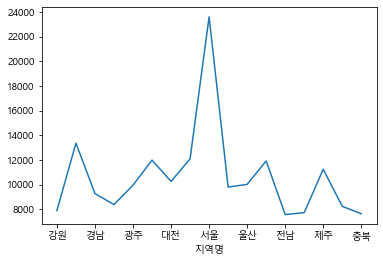

In [56]:
g = df_last.groupby(["지역명"])["평당분양가격"].mean()
g.plot()

지역별 평당분양가격은 선그래프보다는 막대그래프가 더 적합하다.

<AxesSubplot:xlabel='지역명'>

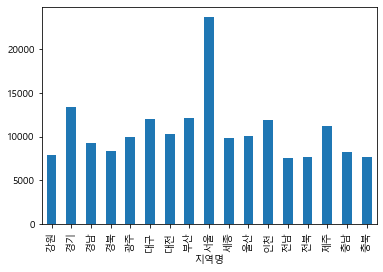

In [57]:
g.plot(kind="bar") #g.plot.bar()와 동일

<AxesSubplot:xlabel='지역명'>

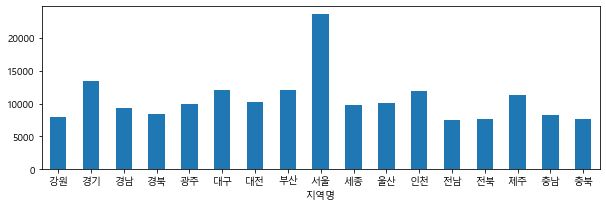

In [58]:
g.plot.bar(rot=0, figsize=(10,3)) #x축 글씨 가로로 전환, 크기 조절.

<AxesSubplot:xlabel='지역명'>

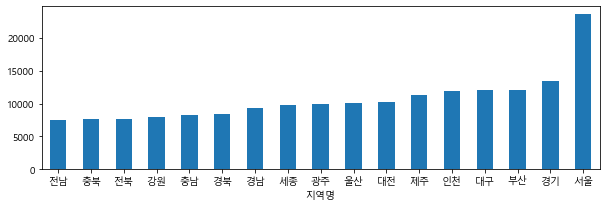

In [59]:
g.sort_values().plot.bar(rot=0, figsize=(10,3))

<AxesSubplot:xlabel='지역명'>

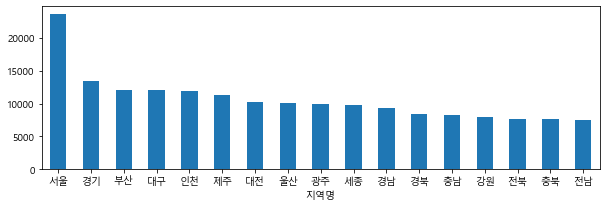

In [60]:
g.sort_values(ascending=False).plot.bar(rot=0, figsize=(10,3))

<AxesSubplot:xlabel='전용면적'>

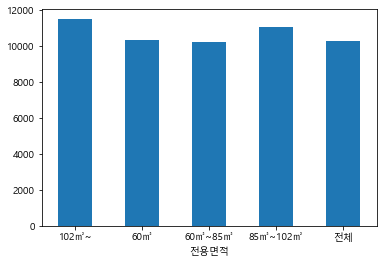

In [61]:
# 전용면적별 분양가격의 평균
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar(rot = 0)

<AxesSubplot:xlabel='연도'>

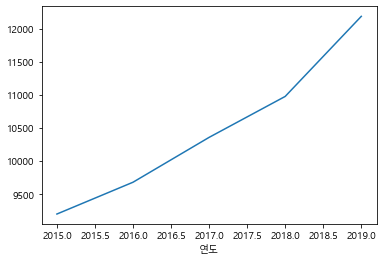

In [62]:
# 연도별 분양가격의 평균
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### Box plot (상자 수염 그림)

자료로부터 얻어낸 통계량의 5가지 요약 수치를 그린다.
1. 최솟값
2. 제 1사분위수
3. 제 2사분위수, 중앙값
4. 제 3사분위수
5. 최댓값

https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

<AxesSubplot:>

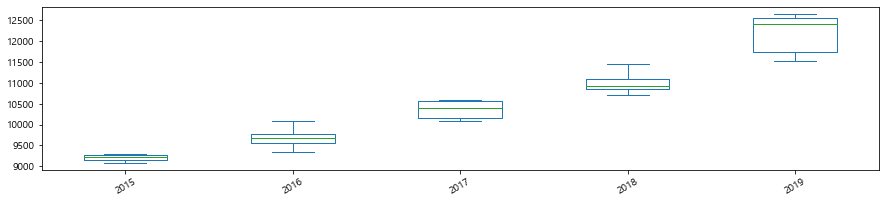

In [63]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box(figsize=(15,3), rot=30)

<AxesSubplot:>

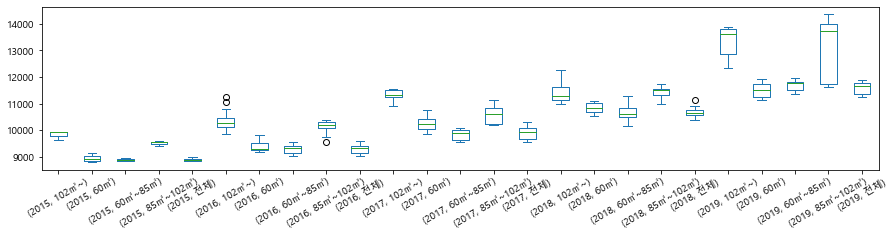

In [64]:
p = df_last.pivot_table(index="월", columns=["연도","전용면적"], values="평당분양가격")
p.plot.box(figsize=(15,3), rot=30)

<AxesSubplot:xlabel='연도'>

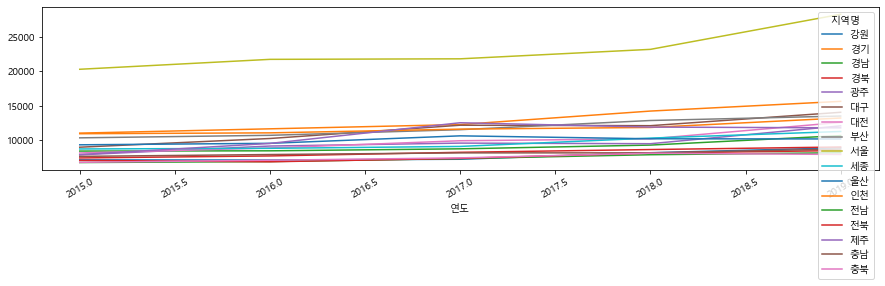

In [65]:
p = df_last.pivot_table(index="연도", columns="지역명", values="평당분양가격")
p.plot(figsize=(15,3), rot=30)

### Seaborn 으로 시각화 해보기

In [66]:
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

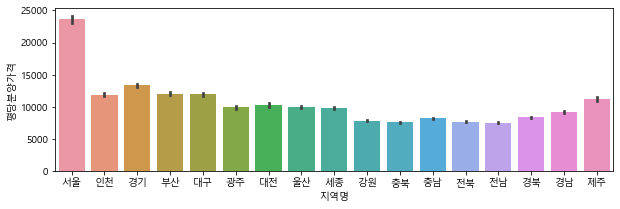

In [67]:
# seaborn의 barplot으로 지역별 평당분양가격 그리기.
plt.figure(figsize=(10,3)) #seaborn은 matplotlib기반이므로 plt에 사이즈 설정.
sns.barplot(data=df_last, x="지역명", y="평당분양가격") #기본 연산은 평균.

 **Seaborn은 pnadas와 달리 groupby나 pivot_table로 집계할 필요가 없다. barplot 내부에서 집계 연산을 해준다.(seaborn의 장점)**

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

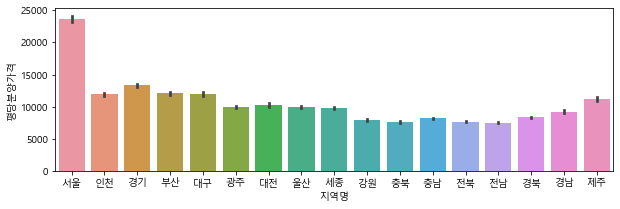

In [68]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=95) #검은색 막대, ci = 신뢰구간
# ci의 기본값은 95(%로 추정해서 그림), sd는 표준편차, None은 그리지 않음.

 **신뢰구간 95%** : 같은 방법으로 표본을 100번 추출했을 때, 100개의 신뢰구간 중 모평균을 포함한 신뢰구간이 95개 정도이다. 

즉, 신뢰구간은 내가 뽑은 표본이 얼마나 모집단 전체를 반영하는지, 다시 말해 표본의 통계적 수치들이 모집단의 통계적 수치들과 얼마나 비슷한지를 나타내는 지표라고 볼 수 있다.

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

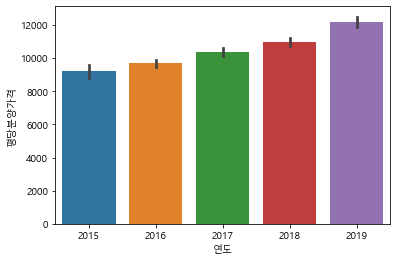

In [69]:
# 연도별 평당분양가격(평균가격)
sns.barplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

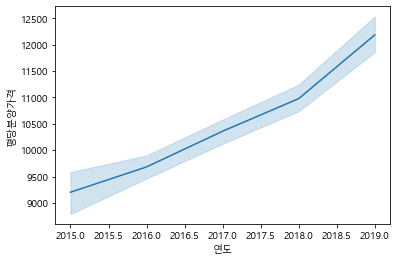

In [70]:
# 연도별 평당분양가격 - 선그래프
sns.lineplot(data=df_last, x="연도", y="평당분양가격")

**메서드 사용법이 대체로 비슷하다**는 점도 Seaborn의 큰 장점.

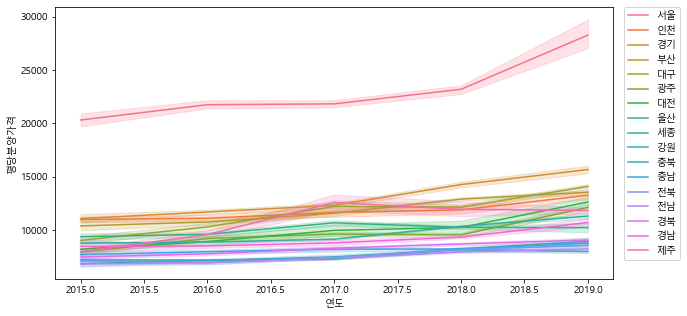

In [71]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명") #카테고리 별로 색상을 다르게 표현
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

잘 보이지 않는다. reㅣplot으로 서브플롯을 그려 해결할 수 있다.

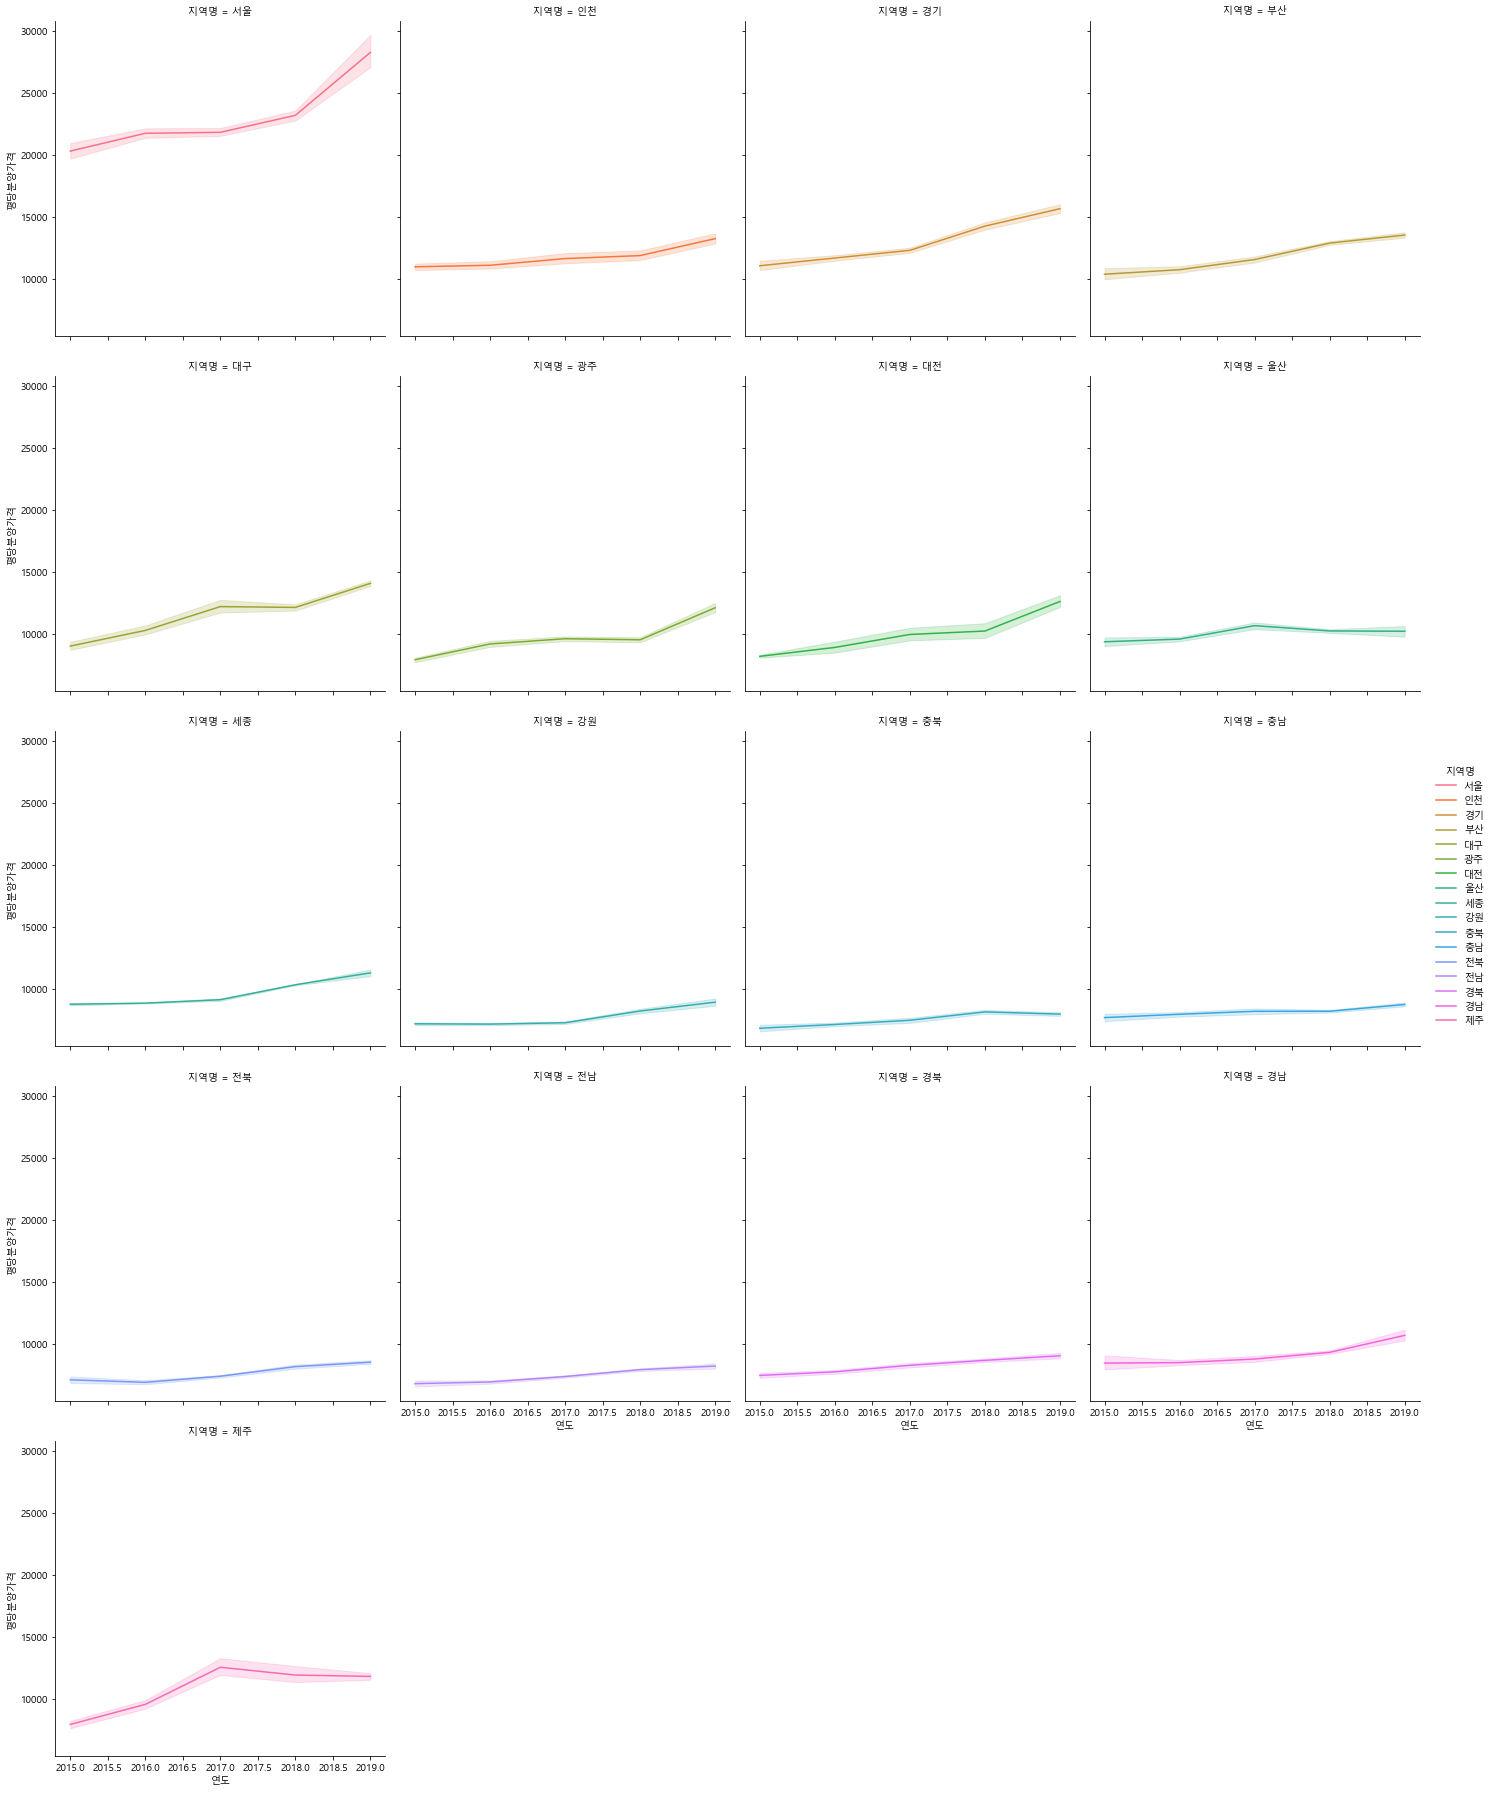

In [72]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", hue="지역명", kind="line",
           col="지역명", col_wrap=4) #한줄에 4개씩.

barplot도 catplot을 통해 서브플롯을 그릴 수 있다.

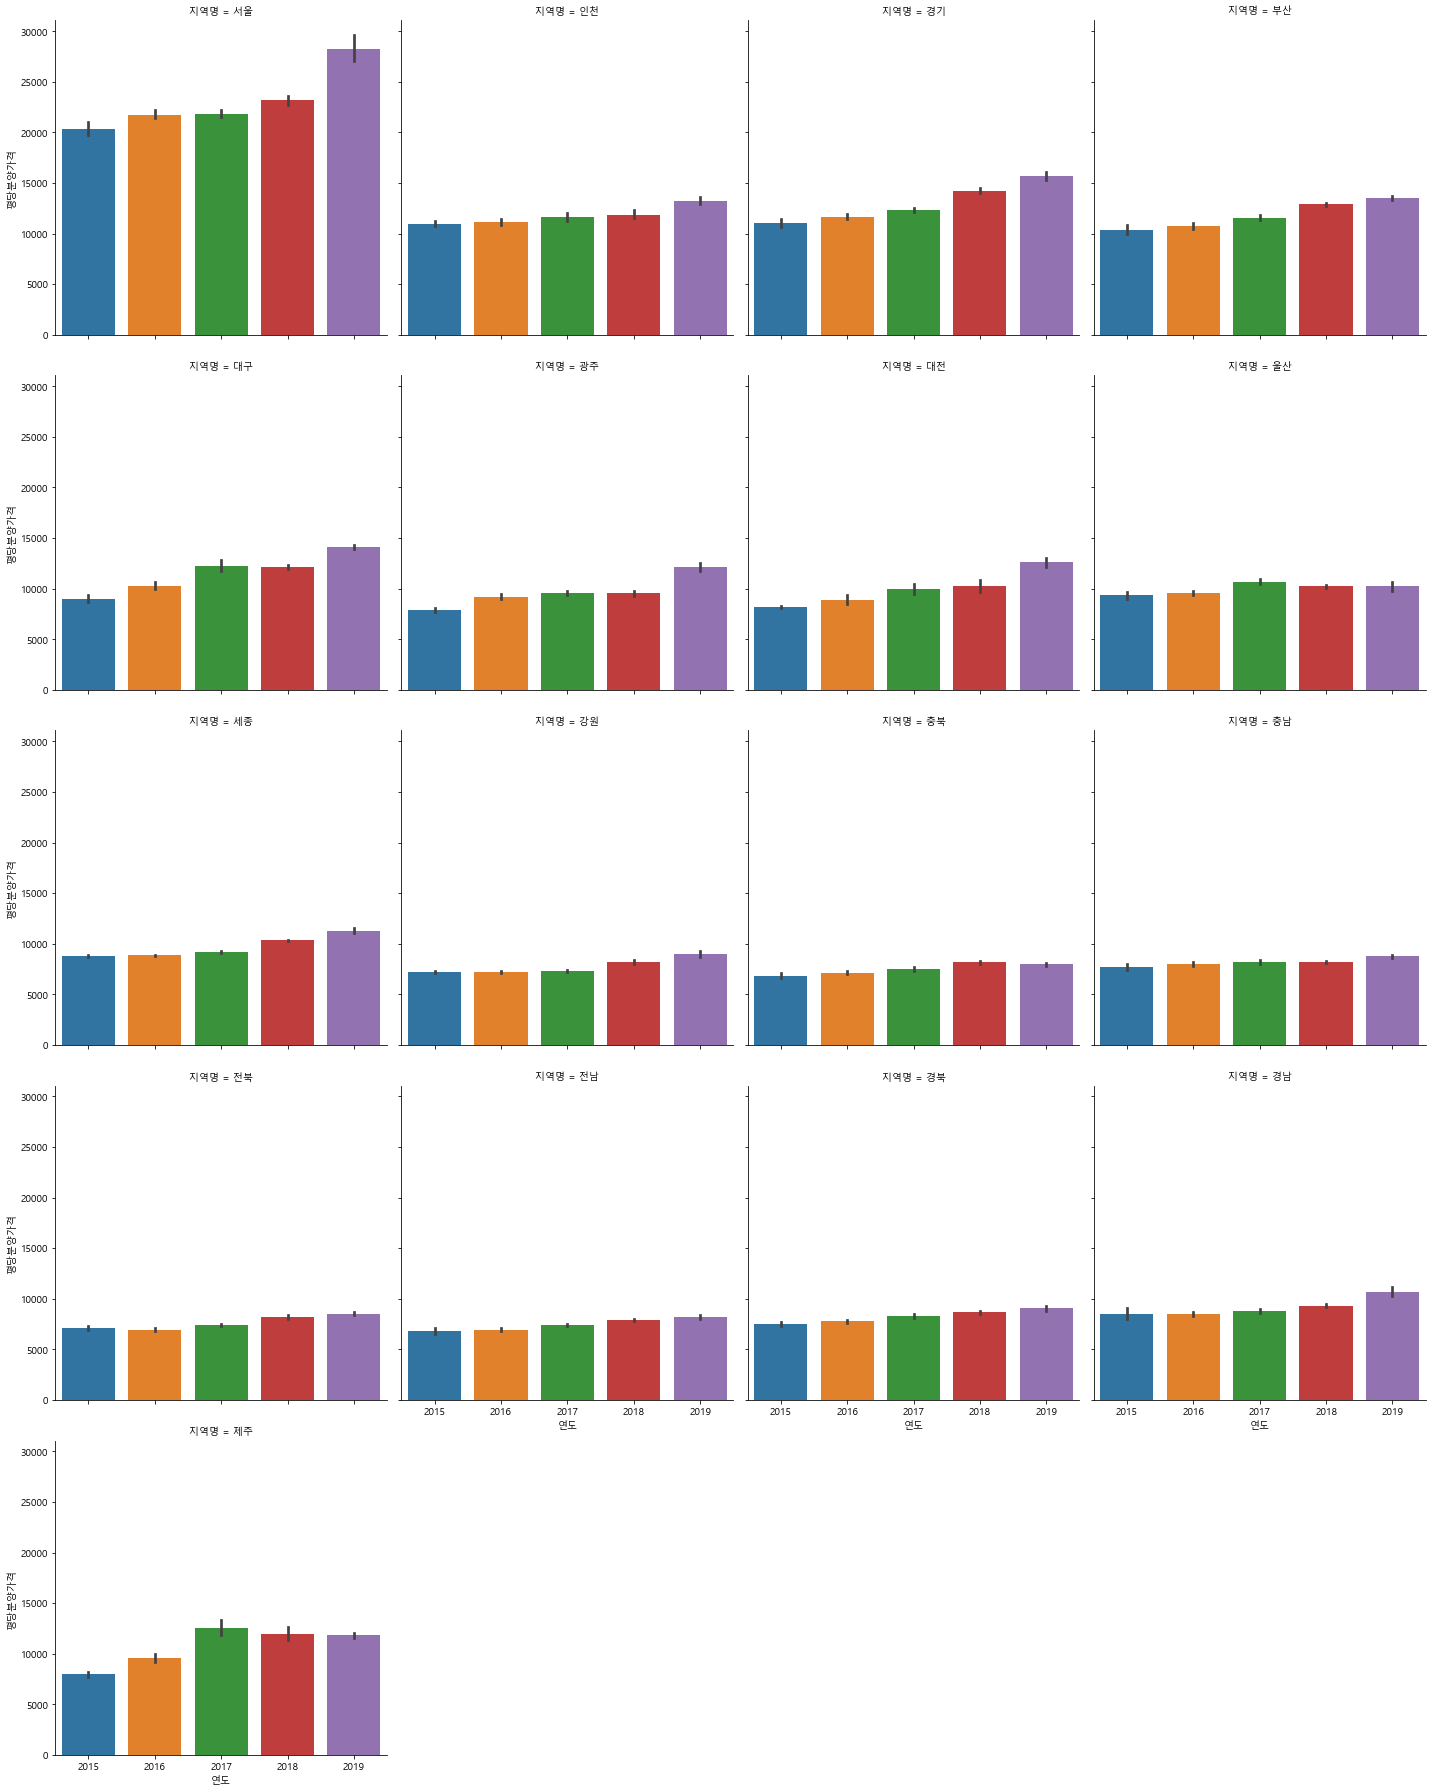

In [73]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar",
           col="지역명", col_wrap=4)

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

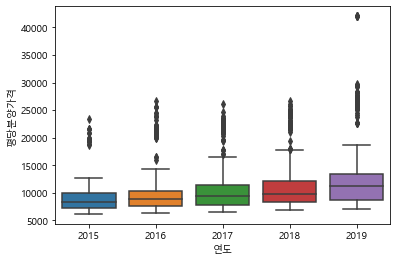

In [75]:
# 연도별 평당분양가격 boxplot

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

점들은 이상치를 의미

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

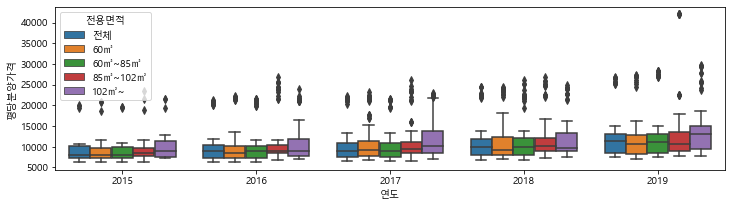

In [78]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")
#hue는 카테고리 수가 작을 때 하는 것이 좋다. 

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

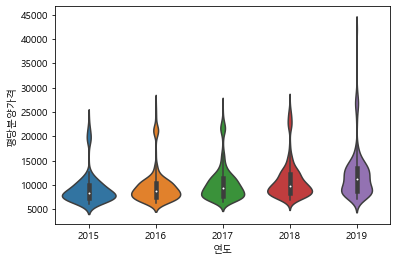

In [81]:
# 연도별 평당분양가격 violinplot

sns.violinplot(data=df_last, x="연도", y="평당분양가격")

분포까지 볼 수 있다.(밀도추정그래프를 세로로 세운 모양)

boxplot의 단점을 보완한 그래프.